In [1]:
from pyiron_workflow import Workflow
import nodes.compositionspace as ncp
import nodes.visualize as nvis

In [2]:
config_file_path = 'experiment_params.yaml'
results_file_path = 'CompositionSpace.Results.1.nxs'
recon_file_path = 'Si.pos'
range_file_path = 'Si.RRNG'

In [4]:
wf = Workflow("compspace")
wf.voxel = ncp.compositionspace_voxelize(config_file_path=config_file_path,
                           results_file_path=results_file_path,
                           recon_file_path=recon_file_path,
                           range_file_path=range_file_path)
wf.autophase = ncp.compositionspace_autophase(config_file_path=config_file_path, 
                                    results_file_path=wf.voxel)
wf.segmentation = ncp.compositionspace_segmentation(config_file_path=config_file_path, 
                                          results_file_path=wf.autophase)
wf.cluster = ncp.compositionspace_clustering(config_file_path=config_file_path, 
                                   results_file_path=wf.segmentation)
wf.xdmf = ncp.generate_xdmf(wf.cluster)
wf.results = nvis.visualize_hdf(wf.cluster)

In [5]:
wf.run()

Load reconstructed positions shape (945211, 3), type <class 'numpy.ndarray'>, dtype float32
Found 25 ranging definitions, performed reduction to 25 unique ones
Si.RRNG parsed successfully
('unknown', 0, array([0.    , 0.0005]))
('Si ++', 1, array([13.8745, 14.241 ]))
('Si +', 2, array([27.856, 28.595]))
('Si +', 3, array([28.826, 29.255]))
('Si +', 4, array([29.783, 30.252]))
('Si ++', 5, array([14.407, 14.643]))
('Si ++', 6, array([14.912, 15.171]))
('Cr +', 7, array([51.699, 54.243]))
('Cr +', 8, array([49.612, 50.526]))
('Cr ++', 9, array([25.771, 27.211]))
('Cr ++', 10, array([24.895, 25.445]))
('Cu +', 11, array([62.567, 63.496]))
('Cu +', 12, array([64.619, 65.548]))
('C +', 13, array([11.866, 12.198]))
('C ++', 14, array([5.896, 6.193]))
('O +', 15, array([15.858, 16.48 ]))
('O +', 16, array([17.838, 18.304]))
('Cr O +', 17, array([67.622, 69.574]))
('Cr O +', 18, array([69.781, 70.156]))
('Cr O +', 19, array([65.76 , 66.264]))
('Cr O ++', 20, array([32.892, 33.275]))
('Cr O ++'

{'xdmf__result_file': 'CompositionSpace.Results.1.nxs.xdmf',
 'results__visualize_hdf': <jupyterlab_h5web.widget.H5Web object>}

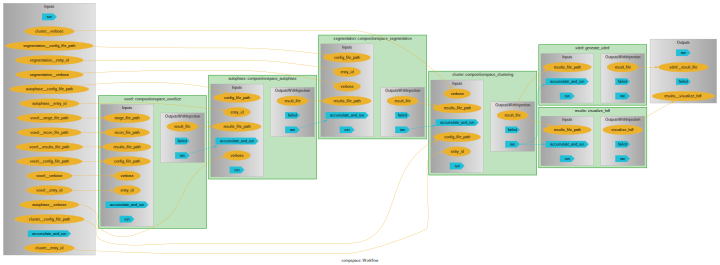

In [6]:
wf.draw(size=(10,10))

In [7]:
wf.outputs.results__visualize_hdf.value

<jupyterlab_h5web.widget.H5Web object>